# Load Modules & Set Variables ALSO my answers to questions are Comments within the cells that produce the answer

In [1]:
# Import modules
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Define data filepath
pathname = '/Users/zachary/Desktop/WINTER22/Geog490/geospatial-data-science/labs/lab2/lab2/or_1992-2018.shp'
# Read data
df = gpd.read_file(pathname) # 'df' stands for DataFrame

Data Dimension Information Access

In [3]:
# Find column labels
df.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYS', 'SOURCE_S_1',
       'NWCG_REPOR', 'NWCG_REP_1', 'NWCG_REP_2', 'SOURCE_REP', 'SOURCE_R_1',
       'LOCAL_FIRE', 'LOCAL_INCI', 'FIRE_CODE', 'FIRE_NAME', 'ICS_209_PL',
       'ICS_209__1', 'MTBS_ID', 'MTBS_FIRE_', 'COMPLEX_NA', 'FIRE_YEAR',
       'DISCOVERY_', 'DISCOVER_1', 'DISCOVER_2', 'NWCG_CAUSE', 'NWCG_GENER',
       'NWCG_CAU_1', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE',
       'FIRE_SIZE_', 'LATITUDE', 'LONGITUDE', 'OWNER_DESC', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'geometry'],
      dtype='object')

In [4]:
df.dtypes

OBJECTID       float64
FOD_ID           int64
FPA_ID          object
SOURCE_SYS      object
SOURCE_S_1      object
NWCG_REPOR      object
NWCG_REP_1      object
NWCG_REP_2      object
SOURCE_REP      object
SOURCE_R_1      object
LOCAL_FIRE      object
LOCAL_INCI      object
FIRE_CODE       object
FIRE_NAME       object
ICS_209_PL      object
ICS_209__1      object
MTBS_ID         object
MTBS_FIRE_      object
COMPLEX_NA      object
FIRE_YEAR        int64
DISCOVERY_      object
DISCOVER_1       int64
DISCOVER_2      object
NWCG_CAUSE      object
NWCG_GENER      object
NWCG_CAU_1      object
CONT_DATE       object
CONT_DOY       float64
CONT_TIME       object
FIRE_SIZE      float64
FIRE_SIZE_      object
LATITUDE       float64
LONGITUDE      float64
OWNER_DESC      object
STATE           object
COUNTY          object
FIPS_CODE       object
FIPS_NAME       object
geometry      geometry
dtype: object

Which county had the most human caused wildfires >50 acres?

In [5]:
df_50acres = df[df['FIRE_SIZE'] > 50]
df_50acres_human = df_50acres[df_50acres['NWCG_CAUSE'] == 'Human']

df_50acres_human['FIPS_NAME'].describe()

#As we can see, the top county is Wasco County with a frequency of 71

count              627
unique              38
top       Wasco County
freq                71
Name: FIPS_NAME, dtype: object

Which month had the most natural caused wildfires >100 acres?

In [6]:
#Get all fires over 100 acres
df_100acres = df[df['FIRE_SIZE'] > 100]

#Select only for naturally caused fires
df_100acres_natural = df_100acres[df_100acres['NWCG_CAUSE'] == 'Natural']

#Make the data date time compatible
datetime = pd.to_datetime(df_100acres_natural['DISCOVERY_'], format='%Y/%m/%d %H:%M:%S.%f')
df_100acres_natural['datetime'] = datetime

#Describe by Month
df_100acres_natural.iloc[:,0].groupby(df_100acres_natural['datetime'].dt.month).describe()

#As we can see month 8, August has the highest count of naturally caused fires with over 100acres of burn area

/Users/zachary/opt/anaconda3/envs/lab2/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,count,mean,std,min,25%,50%,75%,max
datetime,,,,,,,,
4,2.0,1.818924e+06,340120.483071,1578423.0,1698673.75,1818924.5,1939175.25,2059426.0
5,6.0,5.455263e+05,751680.036714,35844.0,199729.75,342059.0,342843.75,2057804.0
6,98.0,1.116859e+06,780556.385350,49721.0,340198.25,1578424.5,1804604.00,2060435.0
7,410.0,8.178679e+05,732139.566738,5928.0,232036.75,343075.5,1647839.50,2118754.0
8,549.0,7.832307e+05,712959.559880,4139.0,231968.00,342951.0,1567836.00,2061310.0
9,93.0,7.743897e+05,698169.996122,15153.0,231750.00,343289.0,1467774.00,1905213.0
10,6.0,1.365753e+06,389404.959327,720369.0,1251945.50,1467603.5,1467695.75,1891158.0


How many fires >200 acres have an undetermined cause (e.g. Missing data/not specified/undetermined?

In [7]:
#Get all fires over 200 acres
df_200acres = df[df['FIRE_SIZE'] > 200]

#select unknown causes
df_200acres_unknown = df_200acres[df_200acres['NWCG_CAUSE']=='Missing data/not specified/undetermined']

#call count
df_200acres_unknown.count()

#Since most fields say 13, well say there are 13 fires that qualify

OBJECTID      13
FOD_ID        13
FPA_ID        13
SOURCE_SYS    13
SOURCE_S_1    13
NWCG_REPOR    13
NWCG_REP_1    13
NWCG_REP_2    13
SOURCE_REP    13
SOURCE_R_1    13
LOCAL_FIRE     0
LOCAL_INCI     5
FIRE_CODE      8
FIRE_NAME     13
ICS_209_PL    10
ICS_209__1     0
MTBS_ID        3
MTBS_FIRE_     3
COMPLEX_NA     0
FIRE_YEAR     13
DISCOVERY_    13
DISCOVER_1    13
DISCOVER_2    11
NWCG_CAUSE    13
NWCG_GENER    13
NWCG_CAU_1     0
CONT_DATE      7
CONT_DOY       7
CONT_TIME      6
FIRE_SIZE     13
FIRE_SIZE_    13
LATITUDE      13
LONGITUDE     13
OWNER_DESC    13
STATE         13
COUNTY         9
FIPS_CODE      9
FIPS_NAME      9
geometry      13
dtype: int64

What is the name, date, and county of the largest sized fire?

In [8]:
df.sort_values('FIRE_SIZE',0, 0)


/var/folders/8v/6dq3dnld7rx4qv5wr7vx0w5m0000gn/T/ipykernel_26138/24225192.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_values except for the argument 'by' will be keyword-only
  df.sort_values('FIRE_SIZE',0, 0)


,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYS,SOURCE_S_1,NWCG_REPOR,NWCG_REP_1,NWCG_REP_2,SOURCE_REP,SOURCE_R_1,...,FIRE_SIZE,FIRE_SIZE_,LATITUDE,LONGITUDE,OWNER_DESC,STATE,COUNTY,FIPS_CODE,FIPS_NAME,geometry
66964,1578392.0,201508655,W-649635,FED,DOI-WFMI,BLM,USORVAD,Vale District,ORVAD,Vale District,...,558198.30,G,42.391894,-117.893687,BLM,OR,Malheur,41045,Malheur County,POINT (-117.89369 42.39189)
65681,153681.0,155225,FS-382506,FED,FS-FIRESTAT,FS,USORRSF,Rogue River-Siskiyou National Forest,0611,Siskiyou National Forest,...,499945.00,G,42.038889,-123.911667,USFS,OR,None,None,None,POINT (-123.91167 42.03889)
47561,1733723.0,300024929,W-676717,FED,DOI-WFMI,BLM,USORVAD,Vale District,ORVAD,Vale District,...,280141.00,G,43.328300,-118.224400,BLM,OR,Malheur,41045,Malheur County,POINT (-118.22440 43.32830)
60566,1887267.0,400008336,FS-6842387,FED,FS-FIRESTAT,FS,USORRSF,Rogue River-Siskiyou National Forest,0610,Rogue River-Siskiyou National Forest,...,191125.00,G,42.296667,-123.953611,USFS,OR,015,41015,Curry County,POINT (-123.95361 42.29667)
66542,1577909.0,201508153,W-648062,FED,DOI-WFMI,BLM,USORBUD,Burns District,ORBUD,Burns District,...,160801.00,G,42.818600,-119.175000,BLM,OR,Harney,41025,Harney County,POINT (-119.17500 42.81860)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19238,759240.0,861169,ODF-11419,NONFED,ST-ORORS,ST/C&L,USOR952S,John Day Unit,ORODF-952,John Day Unit,...,0.01,A,44.657890,-119.492890,PRIVATE,OR,12,41023,Grant County,POINT (-119.49289 44.65789)
17897,772073.0,874740,ODF-76975,NONFED,ST-ORORS,ST/C&L,USOR771S,East Lane Unit - ODF,ORODF-771,East Lane Unit,...,0.01,A,44.071500,-122.958330,PRIVATE,OR,20,41039,Lane County,POINT (-122.95833 44.07150)
6319,769744.0,872104,ODF-67571,NONFED,ST-ORORS,ST/C&L,USOR973S,Pendleton Unit,ORODF-973,Pendleton Unit,...,0.01,A,45.125310,-118.939360,PRIVATE,OR,30,41059,Umatilla County,POINT (-118.93936 45.12531)
17895,772071.0,874738,ODF-76779,NONFED,ST-ORORS,ST/C&L,USOR771S,East Lane Unit - ODF,ORODF-771,East Lane Unit,...,0.01,A,44.070670,-122.942000,PRIVATE,OR,20,41039,Lane County,POINT (-122.94200 44.07067)


In [9]:
LargestFire = df.iloc[66964]

LargestFire['FIPS_NAME']

'Malheur County'

In [10]:
LargestFire['FIRE_NAME']

'LONG DRAW'

In [11]:
LargestFire['DISCOVERY_']

#As we can see the largest fire was calle the Long Draw which was discovered on July 8th 2012 in Malheur County

'2012/07/08 00:00:00.000'

How many wildfires in Lane County were >50 acres?

In [13]:
#use already existing 50 acres subselection & Select for fires in Lane county
df_50acres_lane = df_50acres[df_50acres['FIPS_NAME'] == 'Lane County']

#Call count
df_50acres_lane.count()

#since most the fields say 33, well say there are 33 fires that qualify as such

OBJECTID      33
FOD_ID        33
FPA_ID        33
SOURCE_SYS    33
SOURCE_S_1    33
NWCG_REPOR    33
NWCG_REP_1    33
NWCG_REP_2    33
SOURCE_REP    33
SOURCE_R_1    33
LOCAL_FIRE    27
LOCAL_INCI    25
FIRE_CODE     27
FIRE_NAME     33
ICS_209_PL    24
ICS_209__1     8
MTBS_ID       12
MTBS_FIRE_    12
COMPLEX_NA    12
FIRE_YEAR     33
DISCOVERY_    33
DISCOVER_1    33
DISCOVER_2    28
NWCG_CAUSE    33
NWCG_GENER    33
NWCG_CAU_1     0
CONT_DATE     24
CONT_DOY      24
CONT_TIME     19
FIRE_SIZE     33
FIRE_SIZE_    33
LATITUDE      33
LONGITUDE     33
OWNER_DESC    33
STATE         33
COUNTY        33
FIPS_CODE     33
FIPS_NAME     33
geometry      33
dtype: int64


# CENSUS DATA

Define Variables & Import modules

In [14]:
# Import modules
from cenpy import products
import matplotlib.pyplot as plt

# Define product
acs = products.ACS(2019)

In [15]:
#Download data 
Multnomah_TravelTime = products.ACS(2019).from_county('Multnomah County, OR', level='tract',
                                        variables=['B08303_001E'])

/Users/zachary/opt/anaconda3/envs/lab2/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/zachary/opt/anaconda3/envs/lab2/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/zachary/opt/anaconda3/envs/lab2/lib/python3.8/site-packages/cenpy/products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future re

<AxesSubplot:>

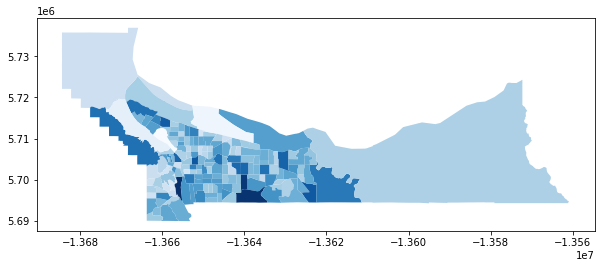

In [16]:
# Plot map
f, ax = plt.subplots(1, 1, figsize=(10,10))
Multnomah_TravelTime.plot('B08303_001E', ax=ax, cmap='Blues')

#This is Multnomah County, econompassing the City of Portland Proper. I chose to symbolize travel time.